In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario

In [ ]:
#Leemos y visualizamos la base de datos
df = pd.read_csv("../data/machine_failure_data.csv")
df

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,12/1/2008,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,12/2/2008,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12/3/2008,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,12/4/2008,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,12/5/2008,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,42,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
142189,6/21/2017,42,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
142190,6/22/2017,42,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
142191,6/23/2017,42,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


In [3]:
#Visualizamos la información de los datos del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  int64  
 2   Min_Temp          141556 non-null  float64
 3   Max_Temp          141871 non-null  float64
 4   Leakage           140787 non-null  float64
 5   Evaporation       81350 non-null   float64
 6   Electricity       74377 non-null   float64
 7   Parameter1_Dir    132863 non-null  object 
 8   Parameter1_Speed  132923 non-null  float64
 9   Parameter2_9am    132180 non-null  object 
 10  Parameter2_3pm    138415 non-null  object 
 11  Parameter3_9am    140845 non-null  float64
 12  Parameter3_3pm    139563 non-null  float64
 13  Parameter4_9am    140419 non-null  float64
 14  Parameter4_3pm    138583 non-null  float64
 15  Parameter5_9am    128179 non-null  float64
 16  Parameter5_3pm    12

Parameter6_9am tiene 88536 datos y Parameter6_3pm 85099, aproximadamente 51 000 datos menos en comparación a las demás variables por lo tanto los eliminamos directamente.
Eliminamos asi mismo a Evaporation y Electricity. En el caso de Leakage resulta ser un estimador perfecto para el modelo, por lo que también lo eliminamos.

In [4]:
#Eliminamos las columnas y volvemos a visualizar los datos del df
df=df.drop(columns=["Parameter6_9am","Parameter6_3pm"])
df=df.drop(columns=["Evaporation","Electricity"])
df=df.drop(columns=["Leakage"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  int64  
 2   Min_Temp          141556 non-null  float64
 3   Max_Temp          141871 non-null  float64
 4   Parameter1_Dir    132863 non-null  object 
 5   Parameter1_Speed  132923 non-null  float64
 6   Parameter2_9am    132180 non-null  object 
 7   Parameter2_3pm    138415 non-null  object 
 8   Parameter3_9am    140845 non-null  float64
 9   Parameter3_3pm    139563 non-null  float64
 10  Parameter4_9am    140419 non-null  float64
 11  Parameter4_3pm    138583 non-null  float64
 12  Parameter5_9am    128179 non-null  float64
 13  Parameter5_3pm    128212 non-null  float64
 14  Parameter7_9am    141289 non-null  float64
 15  Parameter7_3pm    139467 non-null  float64
 16  Failure_today     14

In [5]:
df.describe(include='all')

,Date,Location,Min_Temp,Max_Temp,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,Parameter2_3pm,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
count,142193,142193.000000,141556.000000,141871.000000,132863,132923.000000,132180,138415,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,140787
unique,3436,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,6/23/2017,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,49,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332
mean,NaN,24.740655,12.186400,23.226784,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,NaN
std,NaN,14.237503,6.403283,7.117618,NaN,13.588801,NaN,NaN,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,NaN
min,NaN,1.000000,-8.500000,-4.800000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,NaN
25%,NaN,12.000000,7.600000,17.900000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,NaN
50%,NaN,25.000000,12.000000,22.600000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,NaN
75%,NaN,37.000000,16.800000,28.200000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,NaN


In [6]:
#Aqui pasamos de las 16 direcciones de viento a angulos y posteriormente a 4 grupos (N, E, S y O)
direccion_a_angulo = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Mapear a ángulos
df['Parameter1_Dir_angle'] = df['Parameter1_Dir'].map(direccion_a_angulo)
df['Parameter2_9am_angle'] = df['Parameter2_9am'].map(direccion_a_angulo)
df['Parameter2_3pm_angle'] = df['Parameter2_3pm'].map(direccion_a_angulo)

df['Parameter1_Dir_angle'] = df['Parameter1_Dir_angle'].fillna(0)
df['Parameter2_9am_angle'] = df['Parameter2_9am_angle'].fillna(0)
df['Parameter2_3pm_angle'] = df['Parameter2_3pm_angle'].fillna(0)

def agrupar_direccion(angle):
    if (angle >= 315 or angle < 45):
        return 'N'
    elif (angle >= 45 and angle < 135):
        return 'E'
    elif (angle >= 135 and angle < 225):
        return 'S'
    elif (angle >= 225 and angle < 315):
        return 'W'
    else:
        return 'Desconocido'

columnas_angulos = ['Parameter1_Dir_angle', 'Parameter2_9am_angle', 'Parameter2_3pm_angle']

# Aplicar la funcion a cada columna que termina en _angle y creamos _region
for col in columnas_angulos:
    nueva_col = col.replace('_angle', '_region')
    df[nueva_col] = df[col].apply(agrupar_direccion)

df=df.drop(columns=["Parameter1_Dir","Parameter2_9am","Parameter2_3pm",'Parameter1_Dir_angle', 'Parameter2_9am_angle', 'Parameter2_3pm_angle'])
df

,Date,Location,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Parameter1_Dir_region,Parameter2_9am_region,Parameter2_3pm_region
0,12/1/2008,3,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,W,W,W
1,12/2/2008,3,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,W,N,W
2,12/3/2008,3,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,W,W,W
3,12/4/2008,3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,E,S,E
4,12/5/2008,3,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,W,E,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,42,3.5,21.8,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,E,E,E
142189,6/21/2017,42,2.8,23.4,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,E,S,E
142190,6/22/2017,42,3.6,25.3,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,N,S,N
142191,6/23/2017,42,5.4,26.9,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,N,S,W


In [7]:
#Transformamos la fecha a formato "datetime" y agrupamos las fechas en 4 estaciones
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'invierno'
    elif mes in [3, 4, 5]:
        return 'primavera'
    elif mes in [6, 7, 8]:
        return 'verano'
    else:
        return 'otoño'


df['estacion'] = df['Date'].apply(obtener_estacion)
df

,Date,Location,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Parameter1_Dir_region,Parameter2_9am_region,Parameter2_3pm_region,estacion
0,2008-12-01,3,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,W,W,W,invierno
1,2008-12-02,3,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,W,N,W,invierno
2,2008-12-03,3,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,W,W,W,invierno
3,2008-12-04,3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,E,S,E,invierno
4,2008-12-05,3,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,W,E,N,invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,E,E,E,verano
142189,2017-06-21,42,2.8,23.4,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,E,S,E,verano
142190,2017-06-22,42,3.6,25.3,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,N,S,N,verano
142191,2017-06-23,42,5.4,26.9,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,N,S,W,verano


In [8]:
#Asignamos valores binarios a la variable de fallos y borramos las filas con datos NaN.
df['Failure_today'] = df['Failure_today'].map({'Yes': 1, 'No': 0})
df.dropna(inplace=True)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119590 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   119590 non-null  datetime64[ns]
 1   Location               119590 non-null  int64         
 2   Min_Temp               119590 non-null  float64       
 3   Max_Temp               119590 non-null  float64       
 4   Parameter1_Speed       119590 non-null  float64       
 5   Parameter3_9am         119590 non-null  float64       
 6   Parameter3_3pm         119590 non-null  float64       
 7   Parameter4_9am         119590 non-null  float64       
 8   Parameter4_3pm         119590 non-null  float64       
 9   Parameter5_9am         119590 non-null  float64       
 10  Parameter5_3pm         119590 non-null  float64       
 11  Parameter7_9am         119590 non-null  float64       
 12  Parameter7_3pm         119590 non-null  float64  

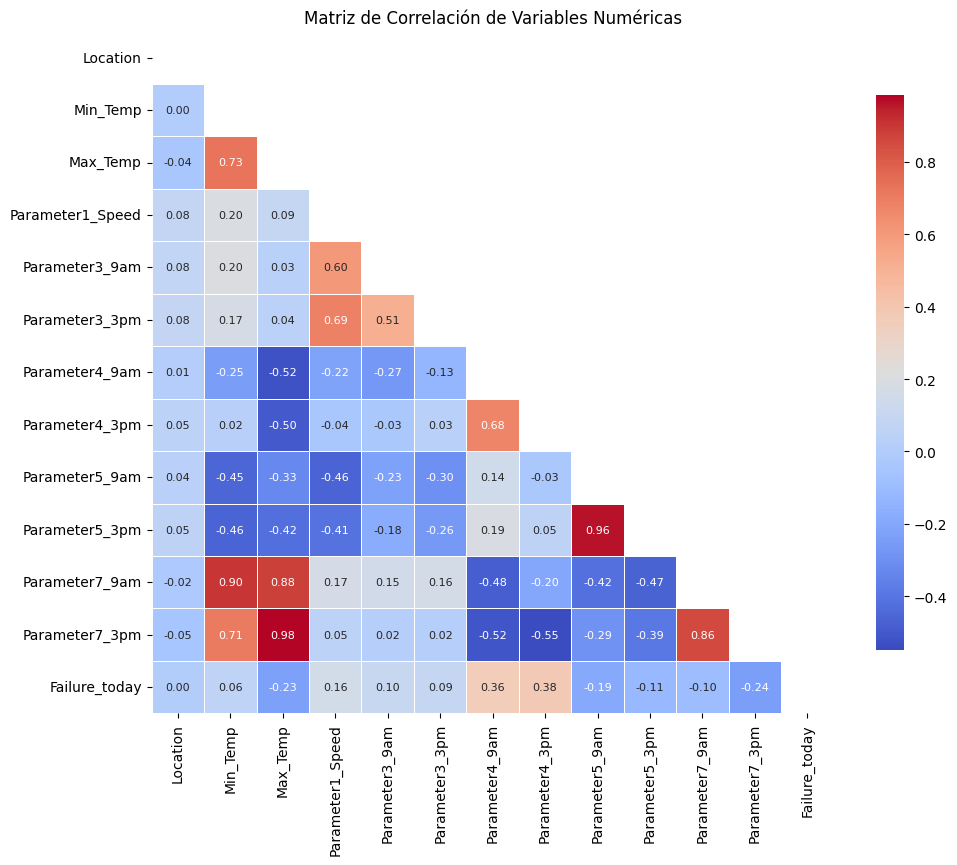

In [9]:
#Creamos heatmap para observar correlaciones entre variables.
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, annot=True, mask=mask, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={'size': 8}, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Alta correlacion entre
Parameter7_9am y Min_Temp,
Parameter7_3pm y Max_temp,
Parameter5_3pm y Parameter5_9am. Estas dos primeras puede que también representen temperaturas y por eso presenten tal correlación.
Eliminamos algunas para evitar correlación en el modelo.

In [10]:
df=df.drop(columns=["Parameter7_9am", "Parameter7_3pm","Parameter5_9am"])

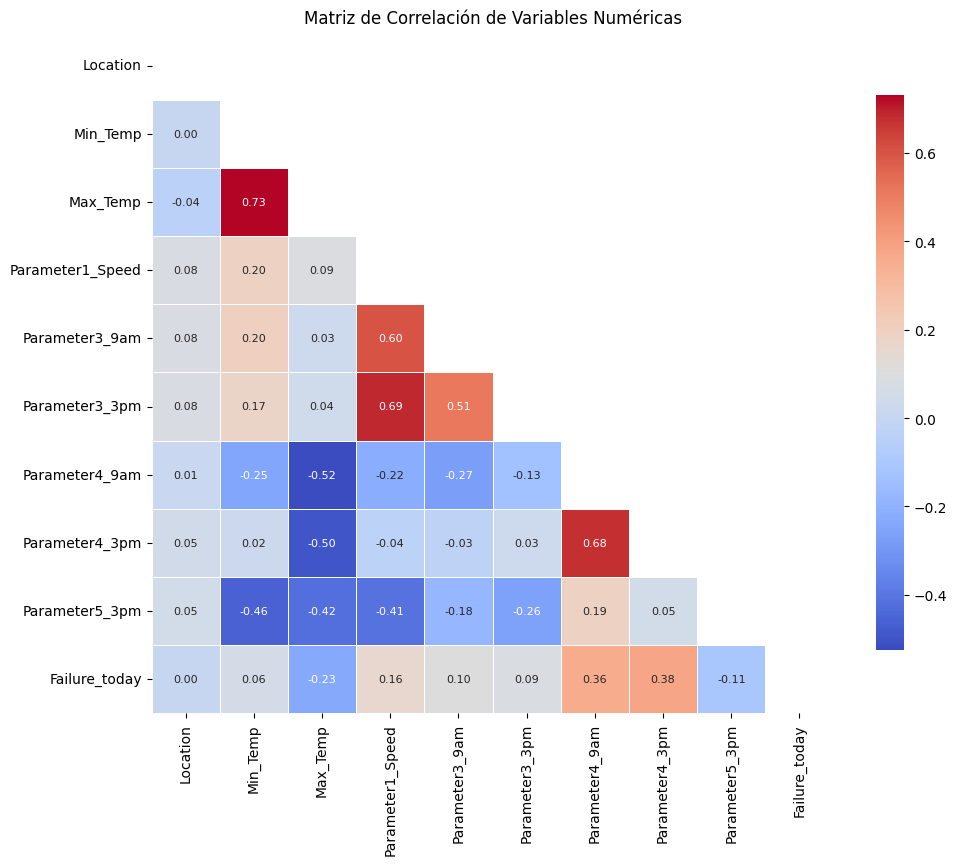

In [11]:
#Volvemos a crear el heatmap para observar después del cambio
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, annot=True, mask=mask, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={'size': 8}, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

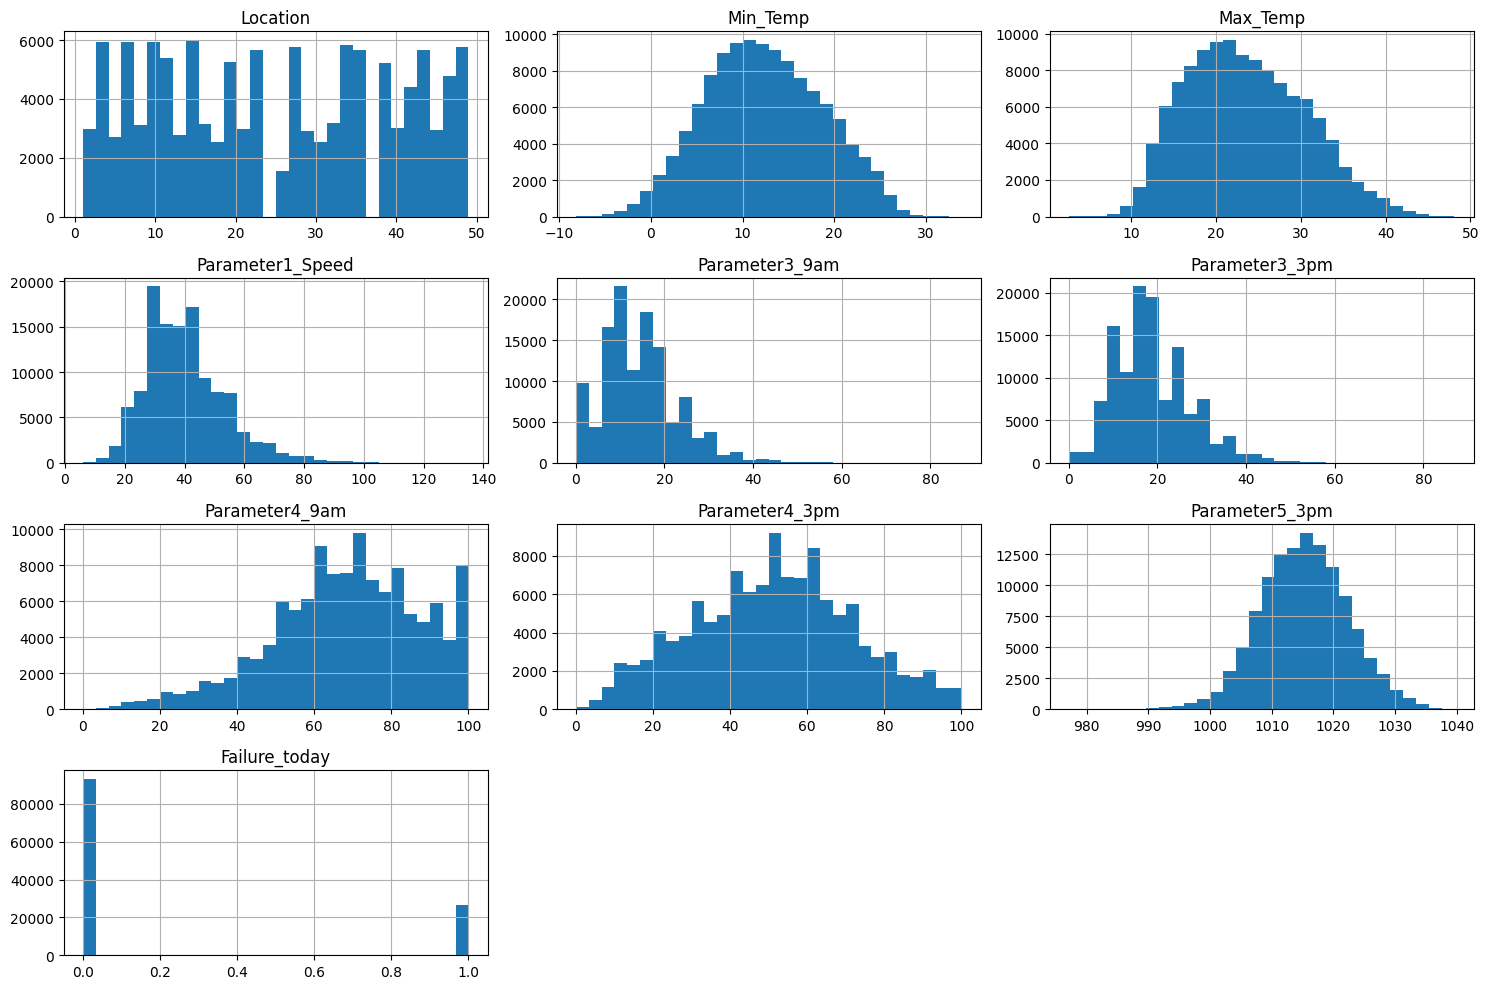

In [12]:
#Creamos gráficos de barra para observar las distriuciones de nuestras variables
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

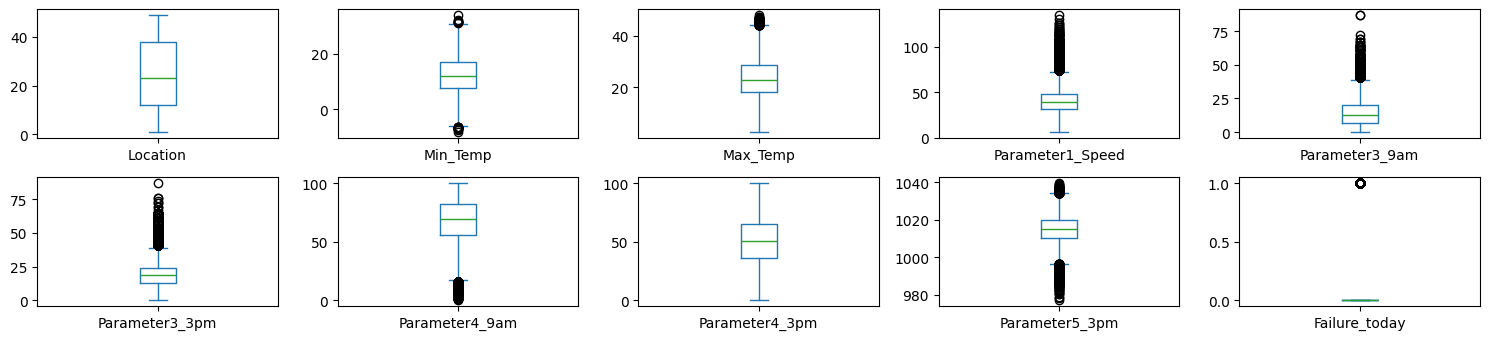

In [13]:
#Hacemos lo mismo pero con graficos de caja para observar datos extremos
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(6, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

2. Ejecute un modelo de probabilidad lineal (MCO) que permita explicar la probabilidad 
#de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. 
#Seleccione las variables dependientes a incluir en el modelo final e interprete su significado

In [14]:
#Transformamos a dummies todas las variables categoricas que utilizaremos en los modelos (Direcciones de viento, location, estacion) en un dataframe nuevo.
df_model = df.drop(columns=["Date"])

#Para direcciones de viento
cols_region = [col for col in df_model.columns if col.endswith('_region')]
df_dummies_region = pd.get_dummies(df_model[cols_region], prefix=cols_region, drop_first=True)
df_model = pd.concat([df_model, df_dummies_region], axis=1)
df_model.drop(columns=cols_region, inplace=True)

#Para location
df_model = pd.get_dummies(df_model, columns=['Location'], drop_first=True)

#Para estacion
df_model = pd.get_dummies(df_model, columns=['estacion'], drop_first=True)

#Convertir booleanos a enteros
df_model = df_model.astype({col: int for col in df_model.select_dtypes(include='bool').columns})

df_model


,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_3pm,Failure_today,Parameter1_Dir_region_N,...,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48,Location_49,estacion_otoño,estacion_primavera,estacion_verano
0,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1007.8,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1008.7,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1012.8,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1006.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,31.0,15.0,13.0,59.0,27.0,1021.2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
142189,2.8,23.4,31.0,13.0,11.0,51.0,24.0,1020.3,0.0,0,...,0,0,0,0,0,0,0,0,0,1
142190,3.6,25.3,22.0,13.0,9.0,56.0,21.0,1019.1,0.0,1,...,0,0,0,0,0,0,0,0,0,1
142191,5.4,26.9,37.0,9.0,9.0,53.0,24.0,1016.8,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
#Definimos nuestro X en base al df creado anteriormente y dropeamos la variable a predecir
X = df_model.drop(columns=["Failure_today"])  # Variables explicativas
X = sm.add_constant(X)  

y = df_model['Failure_today']                 # Variable dependiente

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     741.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:57:55   Log-Likelihood:                -44784.
No. Observations:              119590   AIC:                         8.970e+04
Df Residuals:                  119526   BIC:                         9.032e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

R: De acuerdo a los resultados obtenidos del modelo, el aumento de la temperatura minima se asocia con un incremento en la probabilidad de fallo, por el lado contrario una mayor temperatura maxima en el proceso disminuye la probabilidad. También se observa que a mayores velocidades en el Parameter1_Speed también aumenta la probailidad. En cuanto a los parametros, el "Parameter4_9am" es el mas significativo de estos. 
En cuanto a las "Location" podemos observar que la mayoria de estas representan una disminución en la probabilidad de fallo a excepción de "Location_4" y "Location_42", esto puede corresponder a que en dichas localizaciones se hace mal uso de la máquina.
En las variables de estacion podemos observar que las estaciones de primavera y verano tienden a disminiur la probabilidad de fallo, al contrario de otoño la cual lo aumenta.

3. Ejecute un modelo probit para responder a la pregunta 2.

In [16]:
#Utilizamos la mismas variables dependientes e independientes que usamos en el modelo anterior.
modelo = sm.Probit(y, X)
probit = modelo.fit(cov_type="HC0")
print(probit.summary())

mfx= probit.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.356680
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               119590
Model:                         Probit   Df Residuals:                   119526
Method:                           MLE   Df Model:                           63
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.3248
Time:                        12:57:57   Log-Likelihood:                -42655.
converged:                       True   LL-Null:                       -63172.
Covariance Type:                  HC0   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      21.4906      0.951     22.591      0.000      19.626   

R: Interpretamos similarmente a la pregunta anterior, en base a estos resultados las temperaturas mínimas y máximas se comportan de la misma forma que en el modelo (MCO), Min_Temp tiene dy/dx = 0.0220 y Max_Temp tiene  dy/dx = -0.0260. En cuanto a las velocidades del viento "Parameter1_Speed" se comporta igual que antes, indicando un aumento de probabilidad cuando este aumenta (dy/dx = 0.0042). En el caso de las estaciones tampoco cambia el comportamiento. En cuanto a las "Location" se observan cambios con respecto al modelo anterior, indicando que algunas location ahora aumentan la probabilidad de fallo cuando antes indicaban que no.

In [17]:
modelo_logit = sm.Logit(y, X).fit(disp=False)
print(modelo_logit.summary())

mfx= modelo_logit.get_margeff()
print(mfx.summary())

                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               119590
Model:                          Logit   Df Residuals:                   119526
Method:                           MLE   Df Model:                           63
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.3272
Time:                        12:58:06   Log-Likelihood:                -42502.
converged:                       True   LL-Null:                       -63172.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      36.9592      1.666     22.187      0.000      33.694      40.224
Min_Temp                    0.1967      0.004     52.421      0.000       0.189       0.204


R: En este caso los resultados del modelo logit obtenemos comportamientos muy similares a los obtenidos en el modelo probit. Las temperaturas se comportan de la misma manera pero con unas leve diferencia en su magnitud. El parametro de velocidad "Parameter1_Speed" se comporta de igual forma hasta en su magnitud (dy/dx = 0.0042). En cuanto a las location tampoco se observan mayores diferencias, asda asdasdsa. Las estaciones se comportan de igual manera.

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: De acuerdo a los resultados obtenidos en los 3 modelos, podemos observar que las variables a estudiar se comportan generalmente de igual forma, en el sentido de si aumentan o disminuyen la probabilidad de que ocurra un fallo. Una diferencia entre los modelos ocurre entre el modelo OLS y los modelos Probit y Logit con respecto a la variable de "Location", según el modelo OLS casi todas las "Location" indicaban una disminución en la probabilidad de fallo, pero tanto en el modelo Probit como Logit se observa que varias de estas invierten sus comportamientos. En mi opinión de acuerdo a que modelo es más adecuado para nuestro caso de estudio, el modelo OLS (MCO) no es adecuado dado que no se ajusta bien a la variable binaria a predecir (Failure_Today), en cambio los modelos Probit y Logit ya que están diseñados para manejar variables dependientes binarias. En los dos modelos se obtuvo resultados bastante similares en cuanto a sus valores de R y en cuanto a sus coeficientes marginales por lo que entre elegir uno u otro no hay mayor diferencia, sin embargo el modelo Probit puede ser más adecuado para nuestros datos dado que no tenemos tantos datos extremos.

6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

In [18]:
#Creamos un nuevo df para el modelo poisson y excluimos las variables categoricas
df_poisson = df.copy()

df_poisson = df_poisson.select_dtypes(exclude=['object', 'category'])

df_poisson

,Date,Location,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_3pm,Failure_today
0,2008-12-01,3,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.1,0.0
1,2008-12-02,3,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1007.8,0.0
2,2008-12-03,3,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1008.7,0.0
3,2008-12-04,3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1012.8,0.0
4,2008-12-05,3,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1006.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,31.0,15.0,13.0,59.0,27.0,1021.2,0.0
142189,2017-06-21,42,2.8,23.4,31.0,13.0,11.0,51.0,24.0,1020.3,0.0
142190,2017-06-22,42,3.6,25.3,22.0,13.0,9.0,56.0,21.0,1019.1,0.0
142191,2017-06-23,42,5.4,26.9,37.0,9.0,9.0,53.0,24.0,1016.8,0.0


In [19]:
df_poisson=df_poisson[df_poisson["Date"].dt.year>2008] #Consideramos desde el año 2009 en adelante porque faltan algunos location
df_poisson["Mes"] = df_poisson["Date"].dt.to_period("M")

df_poisson

C:\Users\Nacho\AppData\Local\Temp\ipykernel_6444\1462064157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poisson["Mes"] = df_poisson["Date"].dt.to_period("M")


,Date,Location,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_3pm,Failure_today,Mes
30,2009-01-01,3,11.3,26.5,56.0,19.0,31.0,46.0,26.0,1003.2,0.0,2009-01
31,2009-01-02,3,9.6,23.9,41.0,19.0,11.0,44.0,22.0,1013.1,0.0,2009-01
32,2009-01-03,3,10.5,28.8,26.0,11.0,7.0,43.0,22.0,1014.8,0.0,2009-01
33,2009-01-04,3,12.3,34.6,37.0,6.0,17.0,41.0,12.0,1010.3,0.0,2009-01
34,2009-01-05,3,12.9,35.8,41.0,6.0,26.0,41.0,9.0,1009.2,0.0,2009-01
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,31.0,15.0,13.0,59.0,27.0,1021.2,0.0,2017-06
142189,2017-06-21,42,2.8,23.4,31.0,13.0,11.0,51.0,24.0,1020.3,0.0,2017-06
142190,2017-06-22,42,3.6,25.3,22.0,13.0,9.0,56.0,21.0,1019.1,0.0,2017-06
142191,2017-06-23,42,5.4,26.9,37.0,9.0,9.0,53.0,24.0,1016.8,0.0,2017-06


In [20]:
promedios = df_poisson.groupby(["Mes", "Location"]).agg({"Min_Temp": "mean",
 "Max_Temp":"mean","Parameter1_Speed":"mean","Parameter3_9am": "mean",
 "Parameter3_3pm":"mean","Parameter4_9am":"mean","Parameter4_3pm":"mean","Parameter5_3pm":"mean",
 "Failure_today":"sum"}).reset_index()
promedios

,Mes,Location,Min_Temp,Max_Temp,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_3pm,Failure_today
0,2009-01,1,17.975862,31.868966,39.965517,10.448276,17.931034,38.689655,23.827586,1012.324138,0.0
1,2009-01,3,16.312903,34.658065,42.677419,11.935484,18.548387,41.903226,17.870968,1009.770968,1.0
2,2009-01,4,22.422581,36.058065,51.258065,18.516129,25.032258,37.096774,24.516129,1004.732258,3.0
3,2009-01,5,16.250000,32.733333,41.300000,7.300000,17.466667,65.466667,35.933333,1012.353333,3.0
4,2009-01,6,10.617241,28.548276,48.620690,20.172414,22.241379,50.586207,24.379310,1011.451724,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4071,2017-06,45,4.424000,14.744000,24.040000,4.960000,9.280000,97.840000,67.760000,1026.476000,3.0
4072,2017-06,46,10.100000,18.356000,34.120000,16.440000,16.440000,87.200000,70.880000,1023.492000,13.0
4073,2017-06,47,8.736000,18.616000,34.000000,9.520000,16.320000,88.520000,67.280000,1022.168000,9.0
4074,2017-06,48,11.788889,17.816667,37.166667,14.666667,19.000000,72.166667,68.666667,1024.283333,4.0


In [21]:
poisson= smf.poisson("Failure_today ~ C(Location) + Min_Temp + Max_Temp + Parameter1_Speed + Parameter3_9am + Parameter3_3pm + Parameter4_9am + Parameter4_3pm + Parameter5_3pm",
                     data=promedios).fit()

print(poisson.summary())

Optimization terminated successfully.
         Current function value: 2.227737
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:          Failure_today   No. Observations:                 4076
Model:                        Poisson   Df Residuals:                     4024
Method:                           MLE   Df Model:                           51
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.3207
Time:                        12:58:15   Log-Likelihood:                -9080.3
converged:                       True   LL-Null:                       -13366.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            21.1181      2.908      7.262      0.000      15.418      26.818
C(Locati

R: Para responder esta pregunta agrupamos la data a nivel mensual y por "Location". Se estimo el promedio mensual de los datos para cada "Location", se eliminaron las variables categoricas y se generó un conteo de los fallos por mes en cada "Location" para luego poder aplicarla en el modelo Poisson. En cuanto a los resultados del modelo se obtienen comportamientos similares a los modelos ajustados anteriormente, las variables de temperaturas se comportan de la misma forma, al igual que la de velocidad de viento. En el caso de las "Location" se observa que la mayoria entregan coeficientes negativos, como en el caso de "Location_48" que tiene un coeficiente negativo fuerte (=-0.8283). Se infiere que la ubicación geografica es significativa en cuantos fallos se promedian en el mes.


<Axes: xlabel='plambda', ylabel='Count'>

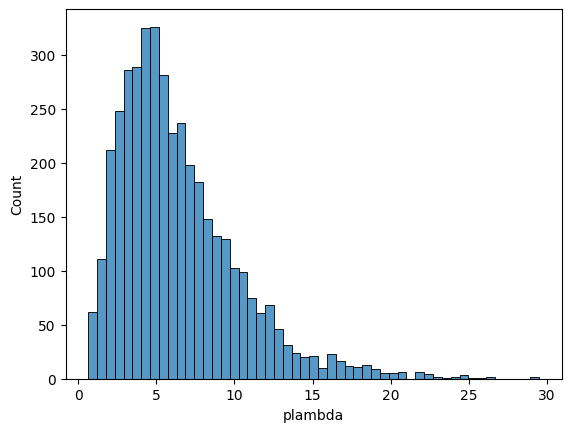

In [22]:
promedios['plambda'] = poisson.predict()
sns.histplot(data=promedios, x="plambda")

7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.

In [23]:
#Utilizamos una formula para calcular la sobredispersión y usamos un mu predecido
mu = poisson.predict()
y = promedios["Failure_today"]
aux = ((y - mu)**2 - mu) / mu  
auxr = sm.OLS(aux, mu).fit()

print(auxr.summary())


                                 OLS Regression Results                                
Dep. Variable:          Failure_today   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              5.239
Date:                Fri, 25 Apr 2025   Prob (F-statistic):                      0.0221
Time:                        12:58:15   Log-Likelihood:                         -7162.4
No. Observations:                4076   AIC:                                  1.433e+04
Df Residuals:                    4075   BIC:                                  1.433e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R: A pesar de obtener un alpha negativo, obtuvimos que es distinto de 0, por lo que concluimos que el modelo Poisson no es adecuado y que existe sobredispersión.

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado

In [24]:
binomial_negativa = smf.glm(
    formula="Failure_today ~ C(Location) + Min_Temp + Max_Temp + Parameter1_Speed + Parameter3_9am + Parameter3_3pm + Parameter4_9am + Parameter4_3pm + Parameter5_3pm",
      data=promedios,
      family=sm.families.NegativeBinomial()
).fit()
print(binomial_negativa.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4076
Model:                            GLM   Df Residuals:                     4024
Model Family:        NegativeBinomial   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11277.
Date:                Fri, 25 Apr 2025   Deviance:                       1069.9
Time:                        12:58:15   Pearson chi2:                     748.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2767
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7994      8.31

c:\Users\Nacho\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


R: De acuerdo a los resultados obtenidos en el modelo binomial negativo obtuvimos un menor ajuste de R cuadrado en comparación al modelo Poisson, lo que no es lo esperado dado que al determinar que existia una sobredispersión se esperaria que el modelo binomial negativo se ajustara mejor a los datos. Sin embargo por el lado de los coeficientes se comportan de la misma forma que los coeficientes obtenidos en poisson.

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: En los resultados se obtuvo para el modelo Poisson un Pseudo R cuadrado = 0.3207, en el modelo Binomial Negativo un Pseudo R-squ = 0.2767 y en la pregunta 7 se determinó un alfa negativo (distinto de 0) y significativo (P>|t| = 0.022). De acuerdo a los resultados obtenidos es más adecuado el modelo Poisson para responder la pregunta de investigación, dado que reduce en mayor cantidad la incertidumbre a un modelo sin predictores ( 32.07% > 27.67% ). Sin embargo esto no corresponde a lo esperado, como mencioné en la respuesta de la pregunta 8, se esperaría que al confirmar sobredispersión, el modelo de binomial negativa redujera en mayor cantidad la incertidumbre en comparación a Poisson. Por otro lado variables robustas a la especificación a lo largo de los modelos fueron "Min_Temp", "Max_Temp", "Parameter1_Speed", algunas "Location" como "Location_48" que mantuvo constantemnte una relación negativa con respecto a los fallos, tambien las variables estacionales mantuvieron sus comportamientos.